在上一章节中我们学习了决策树（Decision Tree），在这一章中我们将继续介绍以决策树为基本单元的机器学习算法——随机森林。

# 算法简介
### Bagging
Bagging是一种集成学习思想，他的集合策略也比较简单：对于分类问题，通常使用简单投票法，得到票数最多的类别为最终的输出。由于Bagging算法每次都进行采样来训练模型，因此泛化能力很强，对于降低模型的方差很有作用。
### 随机森林
了解Bagging后，我们就能理解什么是随机森林了。它由“随机”和“森林”两部分组成。森林顾名思义是由多颗树组成，每棵（决策）树都是一个分类器，对于一个输入样本，K棵树会有K个分类的结果。随机森林集成了所有的分类结果，并将投票结果最多的类别指定为最终的输出。随机森林本身的主要思想在于随机性，通过随机性，提高模型的泛化能力，主要体现在以下三个方面：
* 对训练样本的随机采样
* 对属性的随机采样
* 基于随机采样的属性的决策树构造
关于随机森林的基本单元（决策树）的相关概念已经在上一章节详细描述了，如果您还没学习过决策树，可以查看我们上一章节的内容。

### 优缺点

#### 优点

1. 随机森林能够解决分类与回归两种类型的问题，并且在这两方面都有较好的表现
2. 随机森林实现简单，训练速度快，对于大样本训练有天然优势
3. 子数据集的构造采用有放回式抽样，减小过拟合风险。
4. 随机选择基学习器决策树节点划分特征，在高维时，仍然能高效的训练模型,对部分特征缺失不敏感
5. 在训练后，可以给出各个特征对于输出的重要性

#### 缺点

1. 对于有不同取值的属性的数据，取值划分较多的属性会对随机森林产生更大的影响，所以随机森林在这种数据上产出的属性权值是不可信的。
2. 随机森林虽然对于缺失值不敏感，但是对于噪音比较敏感，在某些噪音较大的分类或回归问题上会过拟合

# 代码实现

同样，我们以鸢尾花数据集进行代码实例操作。

In [ ]:
# 导入数据并划分
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
# 训练随机森林模型
RFC = RandomForestClassifier(n_estimators=100,bootstrap='true',random_state=0,max_depth=4)
RFC.fit(x_train,y_train)
# 预测
RFC_pred = RFC.predict(x_test)
#对模型进行评估
from sklearn import metrics
RFC_accuracy = metrics.accuracy_score(y_test,RFC_pred)
print('RFC_accuracy 模型综合评估矩阵如下：%.3f'% RFC_accuracy)

### 参数详解
1. n_estimators: 代表在预测之前，你想要建立的子树数量。n_estimators过小容易欠拟合，而过大不能显著地提升模型。一般对随机森林的参数调整也都集中在n_estimators上。
2. bootstrap: 代表是否对样本集进行有放回抽样来构建
3. random_state：代表随机种子
4. max_depth：决策树参数，代表决策树的最大深度。如果模型的样本总量多，特征也多，可以限制最大深度；若样本量少或者特征少，则不限制最大深度。

### 可视化：

这里我们选择花萼长度和花萼宽度作为特征。

In [ ]:
x = iris.data[:,:2]
pred = RFC.fit(x,Y)
cmap_light = mpl.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_dark = mpl.colors.ListedColormap(['r','g','b'])
h = 50
lx1,rx1 = x[:,0].min()-0.5, x[:,0].max()+0.5
lx2,rx2 = x[:,1].min()-0.5, x[:,1].max()+0.5
x1,y1 = np.meshgrid(np.linspace(lx1,rx1,h),np.linspace(lx2,rx2,h))
RFC_test = np.stack((x1.flat,y1.flat),axis = 1)
test_pred = RFC.predict(RFC_test)
plt.figure()
plt.pcolormesh(x1,y1,test_pred.reshape(x1.shape),shading='auto',cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=Y,cmap = cmap_dark,edgecolors='k',s=20)
plt.xlim(x1.min(),x1.max())
plt.title('RandomForestClassifier')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

结果如下：
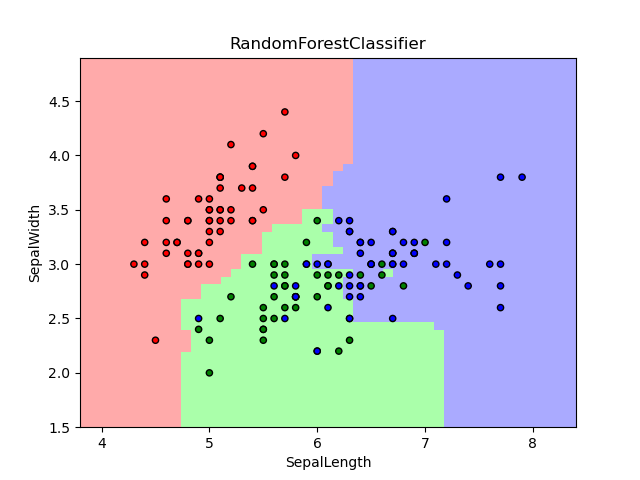
# 作业
使用sklearn提供的RandomForest的API对手写数字数据集的数据进行预测，并尝试对预测的结果进行分析。手写数字数据集使用方法如下:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# 参考来源

1. [https://www.cnblogs.com/pinard/p/6156009.html](https://www.cnblogs.com/pinard/p/6156009.html)
2. [https://blog.csdn.net/qq_43468729/article/details/84727307](https://blog.csdn.net/qq_43468729/article/details/84727307)